# <b><p style='color:orange'>Hotel Name :   <b><p style='color:darkblue'>**Radisson Blu Hotel Ahmedabad**

<b><p style='color:orange'>Data Scouce : <b><p style='color:darkblue'>Booking.com<b><p style='color:orange'>Location : <b><p style='color:darkblue'>Ahmedabad

## <b><p style='color:darkblue'> Name :Akash Thorat

 <b><p style='color:red'>Description: 
<b><p style='color:darkblue'>Radisson Blu is a global upscale hotel brand with properties in various cities around the world, including Ahmedabad, India. Radisson Blu hotels are known for their contemporary design, high-quality amenities, and personalized service. These hotels often cater to both business and leisure travelers, offering features such as spacious rooms, modern meeting facilities, fitness centers, restaurants, and bars.

 <b><p style='color:red'>Objective:
<b><p style='color:darkblue'>The objective of this project is to scrape hotel data from any website and build a model of understanding the use cases to analyze data and find out the hotel strngth and pain points.

# **Import Libraries**

In [6]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import urllib.request as req
import pandas as pd
from textblob import TextBlob

In [ ]:
! pip install collections-extended
! pip install langdetect
! pip install contractions
! pip install yake
! pip install rake_nltk
! pip install unidecode
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 

In [2]:
#importing libraries
from langdetect import detect
from googletrans import Translator
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from nltk.util import ngrams
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import contractions
import yake
from rake_nltk import Rake
from unidecode import unidecode
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')


# **Data Collection**

The project involves scraping hotel reviews along with relevant information such as stay dates, ratings, and reviewer names from Booking.com. The data collected will serve as the foundation for building the sentiment analysis model.

In [3]:
html = requests.get("https://www.booking.com/reviews/in/hotel/radisson-blu-ahmedabad.en-gb.html?aid=357028&label=bin859jc-1FEgdyZXZpZXdzKIICOOgHSAlYA2hQiAEBmAEJuAEXyAEM2AEB6AEB-AECiAIBqAIDuALorsuNBsACAdICJGJmMjRmNDIwLTMyMTQtNDVjZS05MDNmLTlhY2NjOWM1MTQ0ZdgCBeACAQ&sid=4081823f03b6a319da1024de0b04093e&customer_type=total&hp_nav=0&old_page=0&order=featuredreviews&page=1&r_lang=en&rows=75&")
print(html.status_code)

200


In [7]:
#Extract the next pages data

data1 = []
data2 = []
data3 = []
data4 = []


for i in range(0,21):
    
    
    html = requests.get("https://www.booking.com/reviews/in/hotel/radisson-blu-ahmedabad.en-gb.html?aid=357028&label=bin859jc-1FEgdyZXZpZXdzKIICOOgHSAlYA2hQiAEBmAEJuAEXyAEM2AEB6AEB-AECiAIBqAIDuALorsuNBsACAdICJGJmMjRmNDIwLTMyMTQtNDVjZS05MDNmLTlhY2NjOWM1MTQ0ZdgCBeACAQ&sid=4081823f03b6a319da1024de0b04093e&customer_type=total&hp_nav=0&old_page=0&order=featuredreviews&page="+str(i))
    # print(html.status_code)

    data = BeautifulSoup(html.content,'lxml')

    np = data.find_all("p", {"class":"page_link review_next_page"})

    # Extract the href attribute from the <a> tag within the first p element


    if np:

        np_link = np[0].a.get("href")
        cnp_link = "https://www.booking.com"+np_link
        # print("Next page link:", cnp_link)

        for desc in data.find_all("div", {"class": "review_item_review_content"}):
            data1.append(desc.text.strip())

        for desc in data.find_all("p", {"class": "review_staydate"}):
            data2.append(desc.text.strip())

        for desc in data.find_all("p", {"class": "reviewer_name"}):
            data3.append(desc.text.strip())

        review_scores = data.find_all("span", {"class": "review-score-badge"})

        for review_score in review_scores[1:]:
            data4.append(review_score.text.strip())


    else:
        print("Next page link not found.")

df = pd.DataFrame({
    'Review_Content': data1,
    'Review_stay_date': data2,
    'Reviewer_name': data3,
    'Rating': data4
})
df




,Review_Content,Review_stay_date,Reviewer_name,Rating
0,"Good service, food was nice, overall a great c...",Stayed in April 2024,Vrunda,9.0
1,Maintenance of plumbing and electrical of the ...,Stayed in April 2024,Jagdishchandra,9.0
2,The swimming pool is built in the parking area...,Stayed in January 2024,Sowmya,8.0
3,"Small rooms, breakfast buffet shud be expanded...",Stayed in March 2024,Aditya,8.0
4,lobby is small\n\nnice cafe and restaurant\n\n...,Stayed in March 2024,Sanjay,9.0
...,...,...,...,...
518,There are no comments available for this revie...,Stayed in July 2021,Komakula,10
519,There are no comments available for this revie...,Stayed in August 2021,Virambhai,10
520,There are no comments available for this revie...,Stayed in June 2021,Anish,10
521,There are no comments available for this revie...,Stayed in July 2021,Harsh,10


In [8]:
df.to_csv('hotel_data.csv',index=False)

# **Preprocessing The Data**

In [5]:
#Remove the same word containing in Date columns
df['Review_stay_date'] = df['Review_stay_date'].str.replace('Stayed in', '')

In [6]:
df.duplicated().sum()

31

In [7]:
#Remove duplicate values
df.drop_duplicates(inplace=True)

In [8]:
df

,Review_Content,Review_stay_date,Reviewer_name,Rating
0,Maintenance of plumbing and electrical of the ...,April 2024,Jagdishchandra,9.0
1,The swimming pool is built in the parking area...,January 2024,Sowmya,8.0
2,"Small rooms, breakfast buffet shud be expanded...",March 2024,Aditya,8.0
3,lobby is small\n\nnice cafe and restaurant\n\n...,March 2024,Sanjay,9.0
4,"The complimentary coffee was not drinkable, it...",March 2024,Zeeshan,7.0
...,...,...,...,...
518,There are no comments available for this revie...,August 2021,Virambhai,10
519,There are no comments available for this revie...,June 2021,Anish,10
520,There are no comments available for this revie...,July 2021,Harsh,10
521,There are no comments available for this revie...,August 2021,Raghu,4.0


In [9]:
df['Review_Content'][522]

'There are no comments available for this review\n\nStayed in July 2021'

In [24]:
df = df[df['Review_Content'] != 'There are no comments available for this review\n\nStayed in July 2021']

In [25]:
df.shape

(487, 7)

In [11]:
# preprocessing
# 1. remove spaces,newlines
def remove_spaces(data):
    clean_text = data.replace('\\n',' ').replace("\t",' ').replace('\\',' ')
    return clean_text

# 2. contraction mapping
def expand_text(data):
    expanded_text = contractions.fix(data)
    return expanded_text

# 3.handling accented character
def handling_accented(data):
    fixed_text = unidecode(data)
    return fixed_text

# 4. Cleaning
stopword_list = stopwords.words("english")
stopword_list.remove('no')
stopword_list.remove('nor')
stopword_list.remove('not')

def clean_data(data):
    tokens = word_tokenize(data)
    clean_text = [word.lower() for word in tokens if (word not in punctuation) and(word.lower() not in stopword_list) and(len(word)>2) and (word.isalpha())]
    return clean_text                   # and(word.lower() not in stopword_list) and(len(word)>2) and (word.isalpha())]

# 5.autocorrect
def autocorrection(data):
    spell = Speller(lang='en')
    corrected_text = spell(data)
    return corrected_text

# 6. lemmatization
def lemmatization(data):
    lemmatizer = WordNetLemmatizer()
    final_data = []
    for word in data :
        lemmatized_word = lemmatizer.lemmatize(word)
        final_data.append(lemmatized_word)
    return " ".join(final_data)

In [12]:
clean_text_train = df.Review_Content.apply(remove_spaces)

clean_text_train = clean_text_train.apply(expand_text)

clean_text_train = clean_text_train.apply(handling_accented)

clean_text_train = clean_text_train.apply(clean_data)

clean_text_train = clean_text_train.apply(lemmatization)

In [13]:
def analyze_sentiment(text):
    analysis = TextBlob(text)
    # Polarity ranges from -1 (negative) to 1 (positive)
    return 'positive' if analysis.sentiment.polarity > 0 else 'negative'

df['Sentiment'] = clean_text_train.apply(analyze_sentiment)

df

,Review_Content,Review_stay_date,Reviewer_name,Rating,Sentiment
0,Maintenance of plumbing and electrical of the ...,April 2024,Jagdishchandra,9.0,positive
1,The swimming pool is built in the parking area...,January 2024,Sowmya,8.0,positive
2,"Small rooms, breakfast buffet shud be expanded...",March 2024,Aditya,8.0,positive
3,lobby is small\n\nnice cafe and restaurant\n\n...,March 2024,Sanjay,9.0,positive
4,"The complimentary coffee was not drinkable, it...",March 2024,Zeeshan,7.0,negative
...,...,...,...,...,...
515,There are no comments available for this revie...,August 2021,Anish,6.0,positive
516,There are no comments available for this revie...,June 2021,Shreenath,10,positive
518,There are no comments available for this revie...,August 2021,Virambhai,10,positive
519,There are no comments available for this revie...,June 2021,Anish,10,positive


In [14]:
def get_Subjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def get_Polarity(text):
  return TextBlob(text).sentiment.polarity

In [15]:
df['review_subjectivity'] = df['Review_Content'].apply(get_Subjectivity)
df['review_polarity'] = df['Review_Content'].apply(get_Polarity)
df

,Review_Content,Review_stay_date,Reviewer_name,Rating,Sentiment,review_subjectivity,review_polarity
0,Maintenance of plumbing and electrical of the ...,April 2024,Jagdishchandra,9.0,positive,0.700000,0.366667
1,The swimming pool is built in the parking area...,January 2024,Sowmya,8.0,positive,0.670000,0.420000
2,"Small rooms, breakfast buffet shud be expanded...",March 2024,Aditya,8.0,positive,0.566667,0.272222
3,lobby is small\n\nnice cafe and restaurant\n\n...,March 2024,Sanjay,9.0,positive,0.700000,0.175000
4,"The complimentary coffee was not drinkable, it...",March 2024,Zeeshan,7.0,negative,0.653333,-0.080000
...,...,...,...,...,...,...,...
515,There are no comments available for this revie...,August 2021,Anish,6.0,positive,0.400000,0.400000
516,There are no comments available for this revie...,June 2021,Shreenath,10,positive,0.400000,0.400000
518,There are no comments available for this revie...,August 2021,Virambhai,10,positive,0.400000,0.400000
519,There are no comments available for this revie...,June 2021,Anish,10,positive,0.400000,0.400000


## **Analysis Of Data**

In [16]:
df['Sentiment'].value_counts()

Sentiment
positive    416
negative     71
Name: count, dtype: int64

<Axes: xlabel='Sentiment', ylabel='count'>

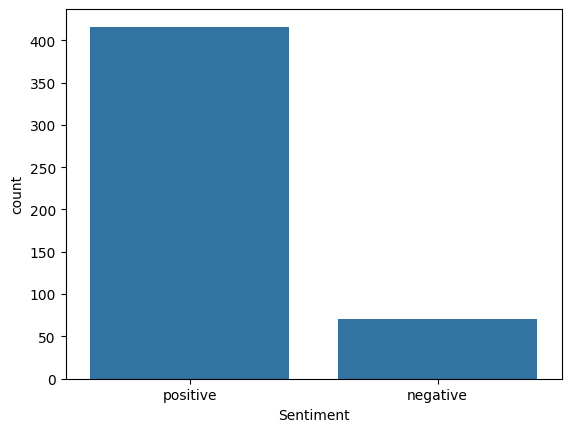

In [17]:
sns.countplot(x=df['Sentiment'])

<b><p style='color:darkblue'>Observation : Very less negative reviews as compare to positive

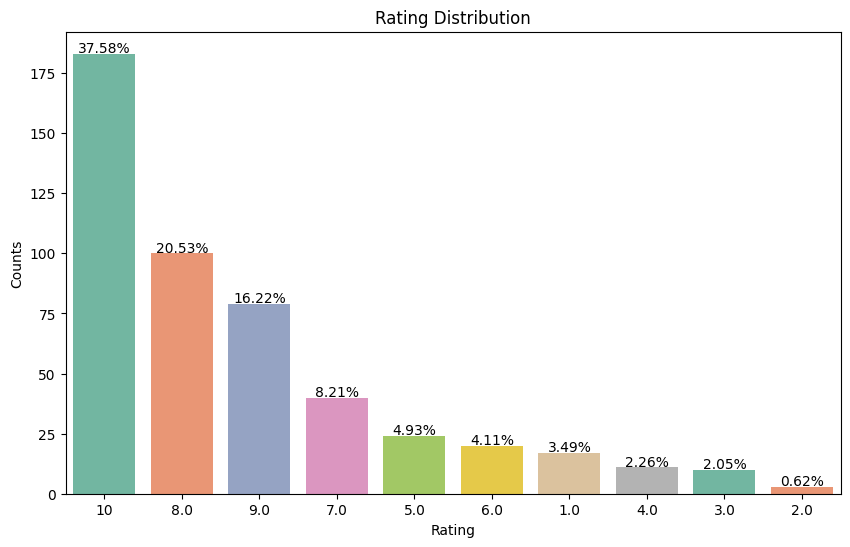

In [18]:

rating_counts = df['Rating'].value_counts()
rating_percentage = (rating_counts / rating_counts.sum()) * 100

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Rating', data=df, order=rating_counts.index, palette='Set2')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5, f'{height / len(df) * 100:.2f}%', ha='center')

plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Counts')

# Show plot
plt.show()


<b><p style='color:red'>Observation :<b><p style='color:darkblue'> As observed in the above graph, 36.7% of customers provided a perfect rating of 10 out of 10, indicating a high level of satisfaction. However, it is noteworthy that a significant portion of customers also gave ratings below 9, 8, and 7, suggesting areas where improvements may be needed. While the overall customer rating is positive, it is crucial to pay closer attention to those customers who have expressed dissatisfaction with their experience. By identifying and understanding the concerns of these customers, we can proactively address any issues and strive to enhance the overall customer satisfaction and experience.

In [19]:
# highest positive sentiment reviews
df[df['review_subjectivity'] >0.7].head(10)


,Review_Content,Review_stay_date,Reviewer_name,Rating,Sentiment,review_subjectivity,review_polarity
0,Maintenance of plumbing and electrical of the ...,April 2024,Jagdishchandra,9.0,positive,0.700000,0.366667
5,very good\n\nStayed in February 2024,February 2024,Ankit,7.0,positive,0.780000,0.910000
6,"I am allergic to milk, for a hotel like this I...",March 2024,Stanley,8.0,positive,0.800000,0.750000
10,N/A\n\nLocation is perfect to visit the places...,March 2024,Anushree,8.0,positive,1.000000,1.000000
21,nothing to report\n\nclean and spacious room.\...,January 2024,Francesca,8.0,positive,0.700000,0.366667
22,"nothing everything was as it should be , howev...",January 2024,Dinesh,8.0,positive,0.733333,0.275694
53,Except an issue with the air-conditioning (whi...,June 2023,Nikhil,9.0,positive,0.772143,0.637143
54,Services can improve.\rDinner buffet options c...,June 2023,Kapil,8.0,positive,0.754286,0.494762
64,The hotel is located neat the Law Garden in Ah...,April 2023,Kpanch,8.0,positive,0.926667,0.667361
67,air conditioning is not upto the mark after re...,March 2023,Mohmed,8.0,positive,0.750000,0.575000


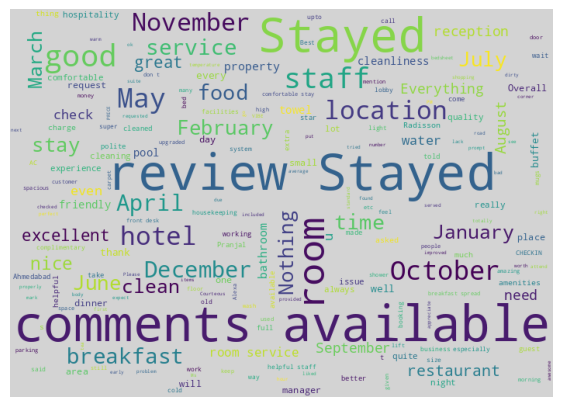

In [20]:
#wordCloud

def wordcloud(data,column):
    df1 = data[column].str.cat(sep = " ")
#     print(df1)
    wordcloud = WordCloud(width=700,height=500,background_color='lightgrey').generate(df1)
    plt.figure(figsize=(7,12))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()


wordcloud(df,"Review_Content")

<b><p style='color:darkblue'>As we can see above wordclod in this there are most of word is Comments,Available Review,good,service,excellent it means they positive available in more times.

In [21]:
df

,Review_Content,Review_stay_date,Reviewer_name,Rating,Sentiment,review_subjectivity,review_polarity
0,Maintenance of plumbing and electrical of the ...,April 2024,Jagdishchandra,9.0,positive,0.700000,0.366667
1,The swimming pool is built in the parking area...,January 2024,Sowmya,8.0,positive,0.670000,0.420000
2,"Small rooms, breakfast buffet shud be expanded...",March 2024,Aditya,8.0,positive,0.566667,0.272222
3,lobby is small\n\nnice cafe and restaurant\n\n...,March 2024,Sanjay,9.0,positive,0.700000,0.175000
4,"The complimentary coffee was not drinkable, it...",March 2024,Zeeshan,7.0,negative,0.653333,-0.080000
...,...,...,...,...,...,...,...
515,There are no comments available for this revie...,August 2021,Anish,6.0,positive,0.400000,0.400000
516,There are no comments available for this revie...,June 2021,Shreenath,10,positive,0.400000,0.400000
518,There are no comments available for this revie...,August 2021,Virambhai,10,positive,0.400000,0.400000
519,There are no comments available for this revie...,June 2021,Anish,10,positive,0.400000,0.400000


In [27]:
#EDA

# ngrams
def ngram_extractor(data,ngram_range):

    tokens = word_tokenize(data)
    ngram = ngrams(tokens,ngram_range)#zip file
    ngram_list1 = []

    for ngram1 in ngram:
        ngram_list1.append(' '.join(ngram1))
        return ngram_list1

In [28]:
list_unigrams = df.Review_Content.apply(lambda x : ngram_extractor(x,1))
list_unigrams

0      [Maintenance]
1              [The]
2            [Small]
3            [lobby]
4              [The]
           ...      
515          [There]
516          [There]
518          [There]
519          [There]
521          [There]
Name: Review_Content, Length: 487, dtype: object

In [29]:
final_unigram = []
for unigram in list_unigrams:
  final_unigram.extend(unigram)
cnt = Counter(final_unigram).most_common(30)
cnt

[('There', 264),
 ('The', 18),
 ('Nothing', 16),
 ('I', 10),
 ('nothing', 10),
 ('the', 5),
 ('Everything', 5),
 ('All', 4),
 ('Service', 4),
 ('Room', 4),
 ('It', 3),
 ('Services', 3),
 ('location', 3),
 ('Breakfast', 3),
 ('Staff', 3),
 ('No', 3),
 ('Nice', 3),
 ('Small', 2),
 ('very', 2),
 ('Cleanliness', 2),
 ('We', 2),
 ('Overall', 2),
 ('cleanliness', 2),
 ('Reception', 2),
 ('air', 2),
 ('Food', 2),
 ('Swimming', 2),
 ('Comfortable', 2),
 ('ROOM', 2),
 ('Pool', 2)]

In [30]:
list_bigrams = df.Review_Content.apply(lambda x : ngram_extractor(x,2))
list_bigrams

0         [Maintenance of]
1           [The swimming]
2            [Small rooms]
3               [lobby is]
4      [The complimentary]
              ...         
515            [There are]
516            [There are]
518            [There are]
519            [There are]
521            [There are]
Name: Review_Content, Length: 487, dtype: object

In [31]:
final_bigram = []
for bigram in list_bigrams:
  final_bigram.extend(bigram)
cnt = Counter(final_bigram).most_common(25)
cnt

[('There are', 263),
 ('Everything is', 4),
 ('Room service', 3),
 ('The swimming', 2),
 ('nothing to', 2),
 ('Reception staff', 2),
 ('air conditioning', 2),
 ('nothing good', 2),
 ('Comfortable stay', 2),
 ('The room', 2),
 ('Nothing Everything', 2),
 ('Nothing that', 2),
 ('I stayed', 2),
 ('Maintenance of', 1),
 ('Small rooms', 1),
 ('lobby is', 1),
 ('The complimentary', 1),
 ('very good', 1),
 ('I am', 1),
 ('Cleanliness to', 1),
 ('It is', 1),
 ('Compact and', 1),
 ('N/A Location', 1),
 ('Nothing Specific', 1),
 ('Small room', 1)]

In [37]:
list_fourgrams = df.Review_Content.apply(lambda x : ngram_extractor(x,4))
list_fourgrams

0       [Maintenance of plumbing and]
1              [The swimming pool is]
2           [Small rooms , breakfast]
3               [lobby is small nice]
4      [The complimentary coffee was]
                    ...              
515           [There are no comments]
516           [There are no comments]
518           [There are no comments]
519           [There are no comments]
521           [There are no comments]
Name: Review_Content, Length: 487, dtype: object

In [38]:
final_fourgram = []
for fourgram in list_fourgrams:
  final_fourgram.extend(fourgram)
cnt = Counter(final_fourgram).most_common(25)
cnt

[('There are no comments', 263),
 ('nothing good Stayed in', 2),
 ('Nothing Everything Stayed in', 2),
 ('I stayed in this', 2),
 ('Maintenance of plumbing and', 1),
 ('The swimming pool is', 1),
 ('Small rooms , breakfast', 1),
 ('lobby is small nice', 1),
 ('The complimentary coffee was', 1),
 ('very good Stayed in', 1),
 ('I am allergic to', 1),
 ('Cleanliness to be improved', 1),
 ('It is old hotel', 1),
 ('Compact and clean place', 1),
 ('N/A Location is perfect', 1),
 ('Nothing Specific Location and', 1),
 ('Small room and small', 1),
 ('We had to change', 1),
 ('The coffee corner needs', 1),
 ('Nothing during trip .', 1),
 ('Friendly and helpful staff', 1),
 ('Expecting some more bakery', 1),
 ('Water leaking from basin', 1),
 ('Clean and centrally located', 1),
 ('Even though non smoking', 1)]

<b><p style='color:darkblue'>In this hotel they are many customer is not write any comment they gives only rating

# Feature Engineering

In [49]:
# Text Vectorization
count_vect = CountVectorizer()
bow = count_vect.fit_transform(clean_text_train).A
new_df = pd.DataFrame(bow,columns = [count_vect.get_feature_names_out()])

In [50]:
new_df

,able,absolutely,acceptable,accessible,accommodate,accommodated,accommodating,aceptable,across,add,...,worth,would,wow,wrapper,wrong,wrt,yaa,year,yes,yet
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
483,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
484,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
485,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df['Sentiment'].replace({'positive':1,'negative':0},inplace=True)

In [53]:
df.head()

,Review_Content,Review_stay_date,Reviewer_name,Rating,Sentiment,review_subjectivity,review_polarity
0,Maintenance of plumbing and electrical of the ...,April 2024,Jagdishchandra,9.0,1,0.700000,0.366667
1,The swimming pool is built in the parking area...,January 2024,Sowmya,8.0,1,0.670000,0.420000
2,"Small rooms, breakfast buffet shud be expanded...",March 2024,Aditya,8.0,1,0.566667,0.272222
3,lobby is small\n\nnice cafe and restaurant\n\n...,March 2024,Sanjay,9.0,1,0.700000,0.175000
4,"The complimentary coffee was not drinkable, it...",March 2024,Zeeshan,7.0,0,0.653333,-0.080000


# Model Building

In [52]:
#Trian Test Split

x = new_df
y = df['Sentiment']

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2,stratify=y)
x_train

,able,absolutely,acceptable,accessible,accommodate,accommodated,accommodating,aceptable,across,add,...,worth,would,wow,wrapper,wrong,wrt,yaa,year,yes,yet
481,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
159,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
313,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
263,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

In [62]:
def evaluate_model(model,ind_var,act):
    pred = model.predict(ind_var)

    acc_score = accuracy_score(act,pred)
    print('Accuracy score is:',acc_score)
    print('**'*20)
    cnf_matrix = confusion_matrix(act,pred)
    print('confusion matrix :\n',cnf_matrix)
    print('**'*20)
    cls_report = classification_report(act,pred)
    print('classification report:\n',cls_report)

    return pred

print('Testing Data Evaluation'.center(55,'*'))
y_pred = evaluate_model(lr_model,x_test,y_test)
print('Training Data Evaluation'.center(60,'*'))
y_pred_train = evaluate_model(lr_model, x_train, y_train)

****************Testing Data Evaluation****************
Accuracy score is: 0.9081632653061225
****************************************
confusion matrix :
 [[ 7  7]
 [ 2 82]]
****************************************
classification report:
               precision    recall  f1-score   support

           0       0.78      0.50      0.61        14
           1       0.92      0.98      0.95        84

    accuracy                           0.91        98
   macro avg       0.85      0.74      0.78        98
weighted avg       0.90      0.91      0.90        98

******************Training Data Evaluation******************
Accuracy score is: 0.9897172236503856
****************************************
confusion matrix :
 [[ 53   4]
 [  0 332]]
****************************************
classification report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        57
           1       0.99      1.00      0.99       332

    accuracy          

In [63]:
cv_rf_model = RandomForestClassifier()
cv_rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [64]:
def evaluate_model(model,ind_var,act):
    pred = model.predict(ind_var)

    acc_score = accuracy_score(act,pred)
    print('Accuracy score is:',acc_score)
    print('**'*20)
    cnf_matrix = confusion_matrix(act,pred)
    print('confusion matrix :\n',cnf_matrix)
    print('**'*20)
    cls_report = classification_report(act,pred)
    print('classification report:\n',cls_report)

    return pred

print('Testing Data Evaluation'.center(55,'*'))
y_pred = evaluate_model(cv_rf_model,x_test,y_test)
print('Training Data Evaluation'.center(60,'*'))
y_pred_train = evaluate_model(cv_rf_model, x_train, y_train)

****************Testing Data Evaluation****************
Accuracy score is: 0.9081632653061225
****************************************
confusion matrix :
 [[ 9  5]
 [ 4 80]]
****************************************
classification report:
               precision    recall  f1-score   support

           0       0.69      0.64      0.67        14
           1       0.94      0.95      0.95        84

    accuracy                           0.91        98
   macro avg       0.82      0.80      0.81        98
weighted avg       0.91      0.91      0.91        98

******************Training Data Evaluation******************
Accuracy score is: 1.0
****************************************
confusion matrix :
 [[ 57   0]
 [  0 332]]
****************************************
classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       1.00      1.00      1.00       332

    accuracy                         

**<b><p style='color:darkblue'>Above Data is imbalance data it one class is higher than the other class in above case so positive class datapoint is more as compare to negative datapoint so this problem because after build the you check the new data so that time it is very chances to get the result is positive sentiment so there are many method to handle the imbalnce data that is oversampling and undersampling using this we can handle the such type of data**

# **TFIDF Vectorizer**

In [57]:
tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(clean_text_train).A
tfidf_df = pd.DataFrame(tfidf,columns = tfidf_vect.get_feature_names_out())
tfidf_df

,able,absolutely,acceptable,accessible,accommodate,accommodated,accommodating,aceptable,across,add,...,worth,would,wow,wrapper,wrong,wrt,yaa,year,yes,yet
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
485,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [59]:
def evaluate_model(model,ind_var,act):
    pred = model.predict(ind_var)

    acc_score = accuracy_score(act,pred)
    print('Accuracy score is:',acc_score)
    print('**'*20)
    cnf_matrix = confusion_matrix(act,pred)
    print('confusion matrix :\n',cnf_matrix)
    print('**'*20)
    cls_report = classification_report(act,pred)
    print('classification report:\n',cls_report)

    return pred

print('Testing Data Evaluation'.center(55,'*'))
y_pred = evaluate_model(rf_model,x_test,y_test)
print('Training Data Evaluation'.center(60,'*'))
y_pred_train = evaluate_model(rf_model, x_train, y_train)

****************Testing Data Evaluation****************
Accuracy score is: 0.9591836734693877
****************************************
confusion matrix :
 [[13  1]
 [ 3 81]]
****************************************
classification report:
               precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       0.99      0.96      0.98        84

    accuracy                           0.96        98
   macro avg       0.90      0.95      0.92        98
weighted avg       0.96      0.96      0.96        98

******************Training Data Evaluation******************
Accuracy score is: 1.0
****************************************
confusion matrix :
 [[ 57   0]
 [  0 332]]
****************************************
classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       1.00      1.00      1.00       332

    accuracy                         

<b><p style='color:darkblue'>After applying the some model in a differant differant vectorizer methods so it give a differant result but overall accuracy in a training adn testing is good by using Random Forest model.so we can another also and check the accuracy,precision,recall score also according to problem statement.

<b><p style='color:red'>**Strength And Pain Points:**




**<b><p style='color:red'>Strength Points**


*   <b><p style='color:darkblue'>Many Guest give good ratings, with more than 75% of Guests providing positive feedback. This indicates that the hotel is performing well.



* <b><p style='color:darkblue'>Accordig to above EDA process we analyze it Guests appreciating amenities such as location,staff, food services adn breakfast services, or on-site dining options highlight the hotel's efforts to provide a range of facilities for guest enjoyment and convenience.
* <b><p style='color:darkblue'>guests praise the quality, variety, and taste of food served at the hotel's restaurants or room service, it reflects positively on the culinary offerings.

* <b><p style='color:darkblue'>Guests feeling safe and secure during their stay and positive comments regarding security personnel and measures demonstrate the hotel's commitment to guest safety.


**<b><p style='color:red'>Pain Points**


* <b><p style='color:darkblue'>Some guests have voiced complaints regarding the small size of the rooms, expressing dissatisfaction with the limited space available for movement and storage. Additionally, concerns have been raised regarding cleanliness standards, with guests noting instances of unclean surfaces, unkempt bathrooms, or inadequate housekeeping services. These issues detract from the overall comfort and satisfaction of guests, highlighting the importance of addressing space constraints and implementing rigorous cleaning protocols to ensure a pleasant and hygienic stay experience
*  <b><p style='color:darkblue'>As we can observe the trigram and word cloud graph some guest review is Negative regarding small rooms,poorly maintained facilities indicate areas where the hotel needs to focus on improving cleanliness standards and maintenance procedures.



*  <b><p style='color:darkblue'>Due to insufficient data, that's a reason we cannot properly analyze. However, I have captured or analyzed all the points based on the available data.










